In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Data Overview

In [4]:
print(titanic.shape)
print(titanic.columns)
titanic.info()
titanic.describe()

(891, 15)
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alo

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Check missing values:

In [5]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])

### Survival Rate:

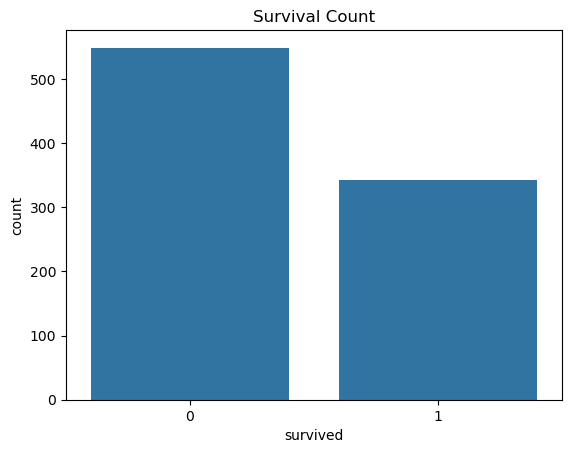

In [8]:
sns.countplot(x='survived', data=titanic)
plt.title('Survival Count')
plt.show()

### Age Distribution:

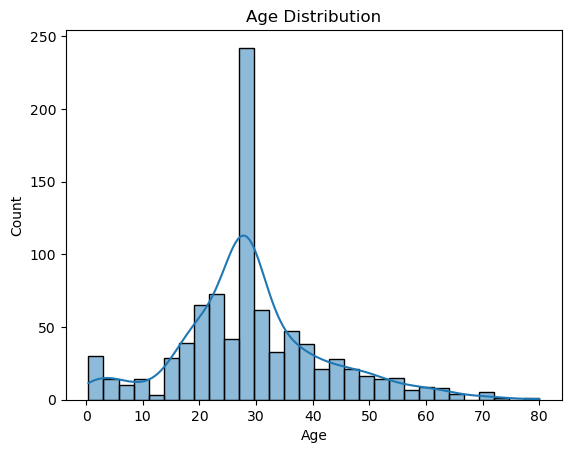

In [9]:
sns.histplot(titanic['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

### Passenger Class:

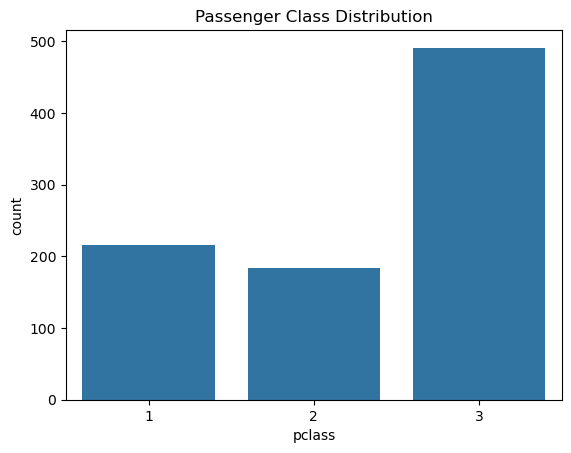

In [10]:
sns.countplot(x='pclass', data=titanic)
plt.title('Passenger Class Distribution')
plt.show()

### Survival rate by class:

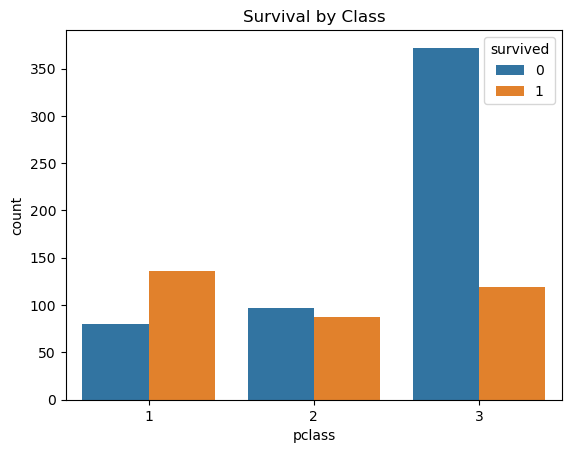

In [11]:
sns.countplot(x='pclass', hue='survived', data=titanic)
plt.title('Survival by Class')
plt.show()

### Survival rate by sex:

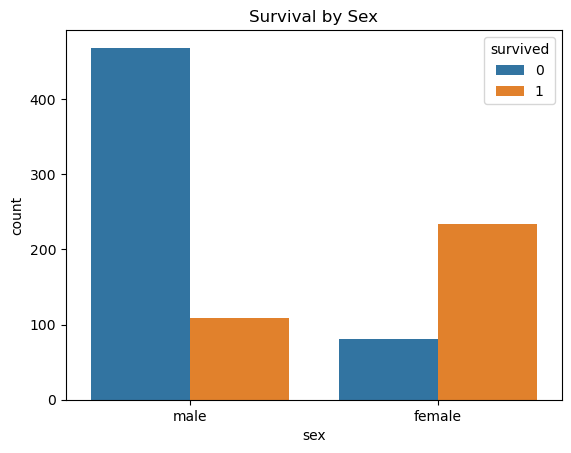

In [12]:
sns.countplot(x='sex', hue='survived', data=titanic)
plt.title('Survival by Sex')
plt.show()

### Age vs Survival:

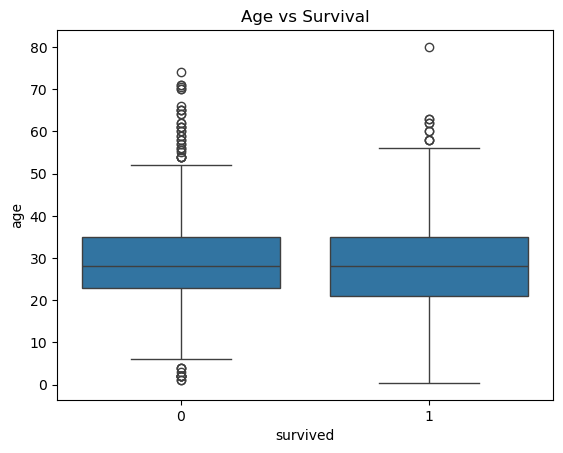

In [13]:
sns.boxplot(x='survived', y='age', data=titanic)
plt.title('Age vs Survival')
plt.show()

### Family size impact:

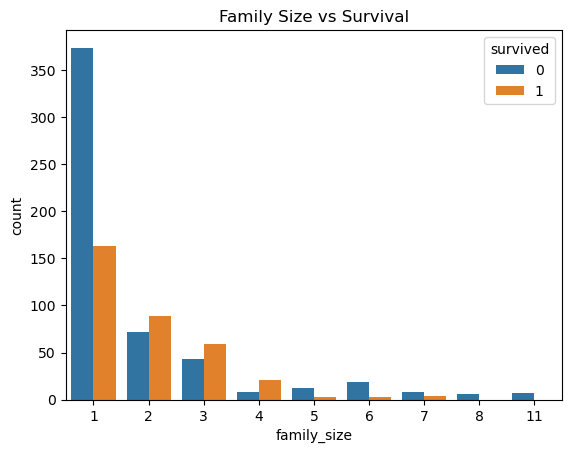

In [14]:
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
sns.countplot(x='family_size', hue='survived', data=titanic)
plt.title('Family Size vs Survival')
plt.show()

### Age distribution by survival status:

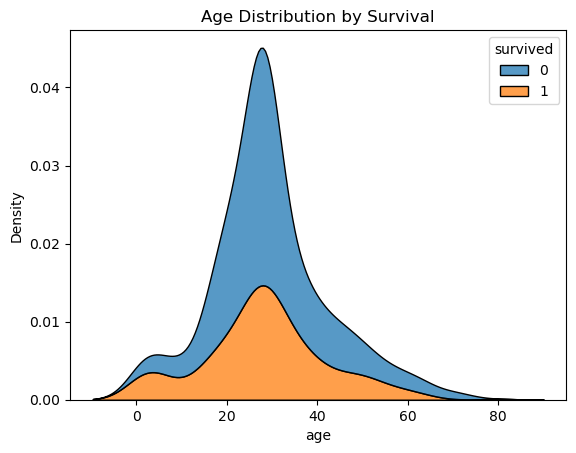

In [15]:
sns.kdeplot(x='age', hue='survived', data=titanic, multiple='stack')
plt.title('Age Distribution by Survival')
plt.show()